# Evaluating NBA Defenders

### FiveThirtyEight developed a metric named DRAYMOND (Defensive Rating Accounting for Yielding Minimal Openness by Nearest Defender) to measure a defender's ability to minimize "openness". Using the DRAYMOND dataset from FiveThirtyEight located at ("https://github.com/fivethirtyeight/data/tree/master/nba-draymond) I want to first determine the top NBA defenders in the 2018 - 2019 season. I first read in the dataset.

In [171]:
library(tidyverse)
draymond <- read.csv("draymond.csv")
head(draymond)

season,player,possessions,DRAYMOND
2017,AJ Hammons,331.0258,-0.1766801
2014,AJ Price,211.7156,5.9121720
2015,AJ Price,633.5186,-1.7909210
2014,Aaron Brooks,3257.9340,-0.9529003
2015,Aaron Brooks,3984.0440,-0.1861272
2016,Aaron Brooks,2276.0170,2.2965770


### I am now interested in creating a scatterplot showing the players with the highest DRAYMOND scores in the 2018 - 2019 NBA season. In order to account for the possibility for players to play very little possessions (low sample size) and have high metrics, I filter the dataset to players with more than 1000 possessions. I also filter the dataset to only those with a score > 2 according to the DRAYMOND metric

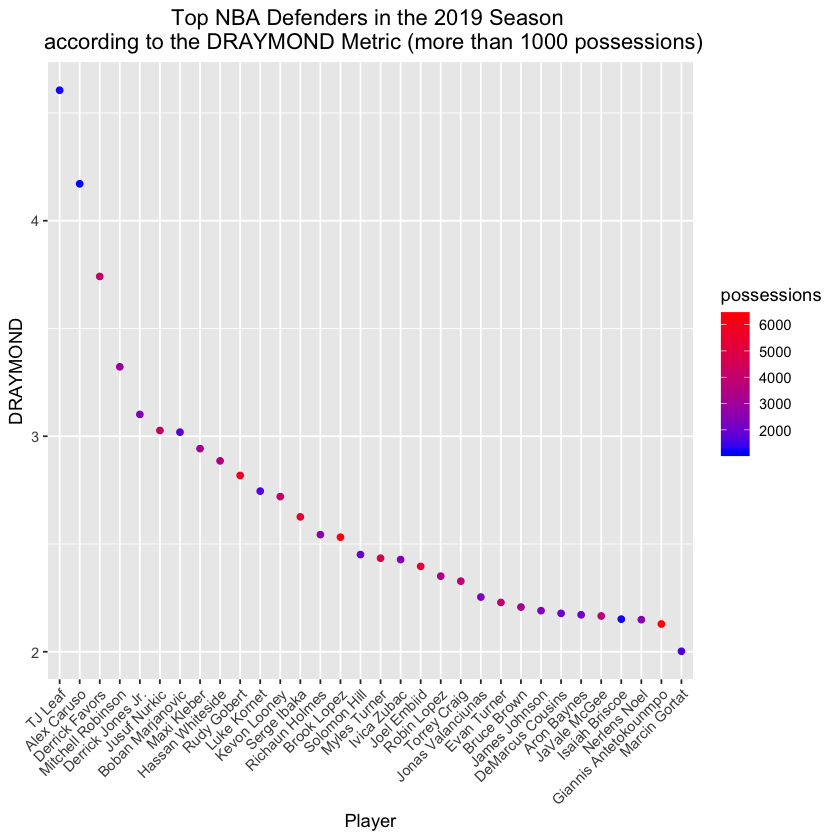

In [137]:
#Visualization 1 (Top defenders in the 2019 NBA season according to the DRAYMOND metric with more than 1000 possessions)
draymond_2019 <- draymond %>% 
    filter(season == 2019, possessions > 1000, DRAYMOND > 2) %>%
    mutate(ind = ifelse(DRAYMOND > 3, 1, 0)) %>%
    arrange(desc(DRAYMOND))
p <- ggplot(draymond_2019, aes(x = reorder(player, -DRAYMOND), y = DRAYMOND, color = possessions)) + geom_point()
p <- p + scale_color_gradient(low="blue", high="red") + theme(axis.text.x = element_text(hjust = 1, angle = 45)) 
p <- p + theme(plot.title = element_text(hjust = 0.5))

p + ggtitle("Top NBA Defenders in the 2018 - 2019 Season \n according to the DRAYMOND Metric (more than 1000 possessions)") + xlab("Player") + ylab("DRAYMOND")

### Now I want to answer the ultiamte question. According to the DRAYMOND Metric, who has been the best NBA defender from 2013 - 2019? I first group the dataset by player name and then summed up each player's DRAYMOND score over the 6 years and summed up each player's possessions over the 6 years. I filtered the dataset to only select players with at least 10,000 possessions over the 6 years. I found that the mean DRAYMOND score was 8.06 and that the standard deviation was 2.51

player,total_dray,total_pos
Draymond Green,18.65794,38281.53
Rudy Gobert,12.57588,24888.69
Joakim Noah,12.54327,15510.81
Luc Mbah a Moute,12.29081,16502.24
Anthony Davis,11.55232,30483.96
Andrew Bogut,10.99663,13887.35


[1] 8.057906

[1] 2.514782

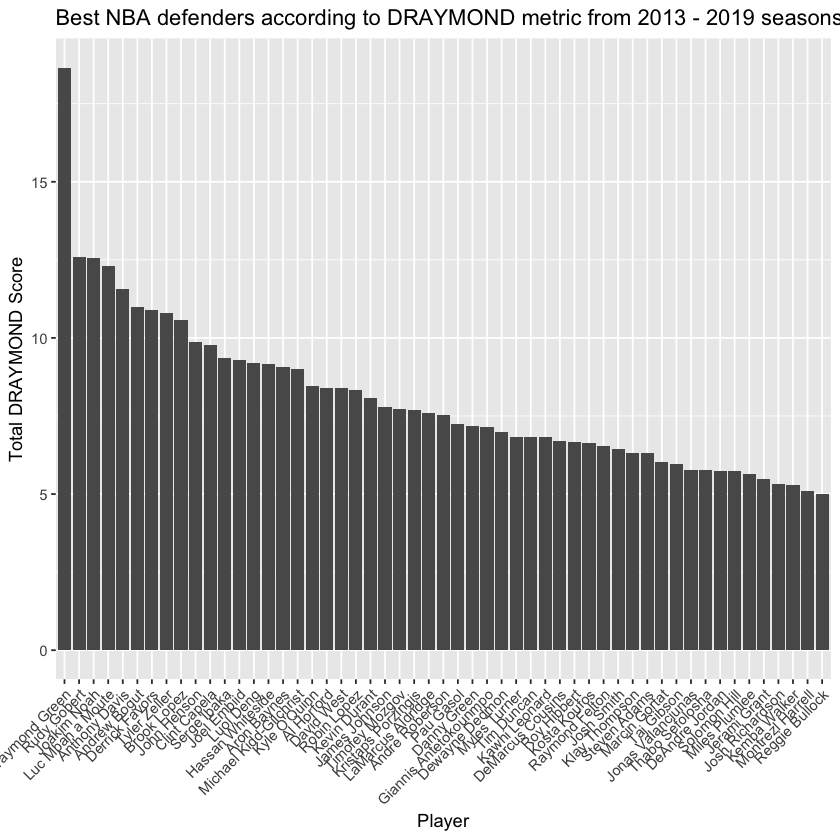

In [173]:
#Visualization 2 (Players with highest overall DRAYMOND score over all seasons in dataset)
draymond_overall <- draymond %>%
    group_by (player) %>%
    summarize(total_dray = sum(DRAYMOND), total_pos = sum(possessions)) %>%
    arrange(desc(total_dray)) %>%
    filter(total_pos > 10000, total_dray > 5)
head(draymond_overall)
p <- ggplot(draymond_overall, aes(x = reorder(player, -total_dray), y = total_dray)) + theme(axis.text.x = element_text(hjust = 1, angle = 45))
p +geom_bar(stat = "identity") + ggtitle("Best NBA defenders according to DRAYMOND metric from 2013 - 2019 seasons") + xlab("Player") + ylab("Total DRAYMOND Score")
mean(draymond_overall$total_dray)
sd(draymond_overall$total_dray)

# I found that Draymond Green had by far the highest summed DRAYMOND score (18.66) over the 6 years (to no one's surprise). Draymond Green has been the best at minimizing the chance at an open shot thoughout his career. This is certainly a big reason for Golden State's defensive success from 2015-2019 

### The 2nd best defender was Rudy Gobert who had a DRAYMOND score of 12.58, over 3 standard deviations less than the score for Draymond Green

### I decided to look into the possibility of some relationship between defensive ratings and possessions. I created a categorical variable "dray_cat" with values 0, 1, 2, 3 corresponding to DRAYMOND scores.  I created a density plot for each season with each plot split by dray_cat. My hypothesis was to find that the those with higher values for "dray_cat" would typically be put on the court for more possessions by coaches because of their defensive value.

[1] 3009

season,player,possessions,DRAYMOND,dray_cat
2017,AJ Hammons,331.0258,-0.1766801,1
2014,AJ Price,211.7156,5.9121720,3
2015,AJ Price,633.5186,-1.7909210,0
2014,Aaron Brooks,3257.9340,-0.9529003,1
2015,Aaron Brooks,3984.0440,-0.1861272,1
2016,Aaron Brooks,2276.0170,2.2965770,3


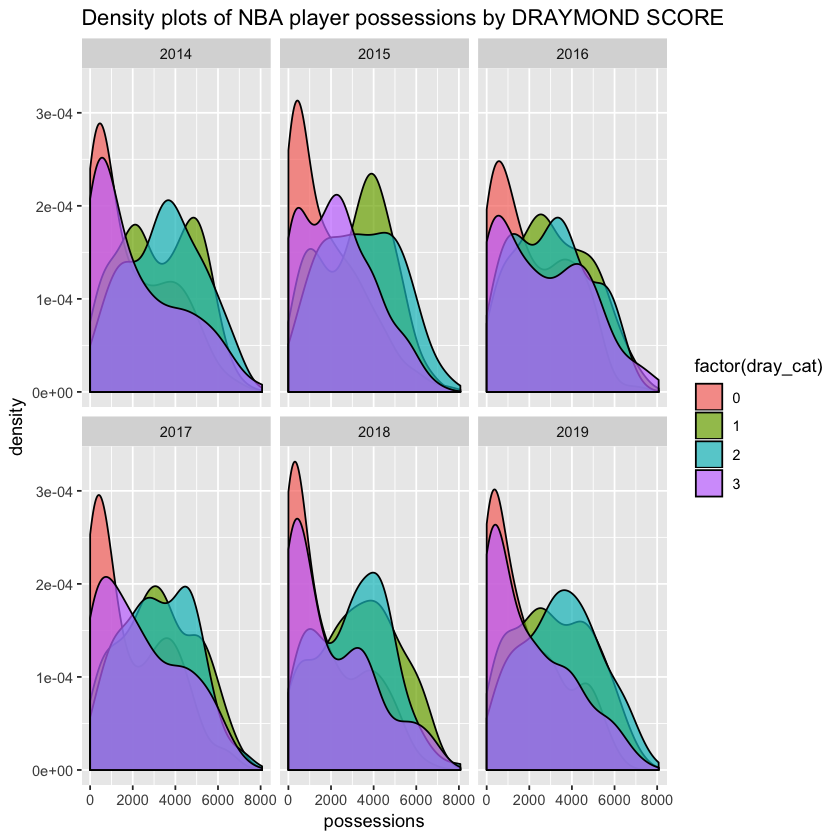

In [175]:
dray_pos <- draymond %>%
    mutate(dray_cat = ifelse(DRAYMOND < -1, 0,
                             ifelse(DRAYMOND > -1 &DRAYMOND < 0, 1,
                                                      ifelse(DRAYMOND > 0 & DRAYMOND < 1, 2, 3))))
nrow(dray_pos)
head(dray_pos)
p <- ggplot(dray_pos, aes(possessions)) + geom_density(aes(fill = factor(dray_cat)), alpha = 0.7) + facet_wrap(~season) + ggtitle ("Density plots of NBA player possessions by DRAYMOND SCORE")
p

### I instead found that my desired hypothesis did not prove true, though it was clear that those with a "dray_cat" score of 0 typically had the least possessions. 